<a href="https://colab.research.google.com/github/Vineetha8193/Volunteer-Data-Analysis-Using-R/blob/main/DER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load required libraries
library(tidyverse)

# Read the data (replace 'volunteer_data.csv' with your file name)
volunteer_data <- read.csv("volunteer_opportunities.csv")

In [ ]:
# Check the structure of the dataset
str(volunteer_data)

'data.frame':	665 obs. of  35 variables:
 $ opportunity_id    : int  4996 5008 5016 5022 5055 5056 5053 5085 5091 5093 ...
 $ content_id        : int  37004 37036 37143 37237 37425 37426 37406 37652 37730 37741 ...
 $ vol_requests      : int  50 2 20 500 15 15 2 20 100 1 ...
 $ event_time        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ title             : chr  "Volunteers Needed For Rise Up & Stay Put! Home Rescue Fair " "Web designer" "Urban Adventures - Ice Skating at Lasker Rink" "Fight global hunger and support women farmers - Join the Oxfam Action Corps in NYC!" ...
 $ hits              : int  737 22 62 14 31 135 156 4407 325 928 ...
 $ summary           : chr  "Building on successful events last summer and earlier this year in the Bronx and in Queens, the Center for NYC "| __truncated__ "Build a website for an Afghan business" "Please join us and the students from Mott Hall on Saturday, January 29th, for an ice skating trip to Lasker Lanes!" "The Oxfam Action Corps is a group of dedicat

In [ ]:
# View column names
colnames(volunteer_data)

[1] "opportunity_id"     "content_id"         "vol_requests"      
 [4] "event_time"         "title"              "hits"              
 [7] "summary"            "is_priority"        "category_id"       
[10] "category_desc"      "amsl"               "amsl_unit"         
[13] "org_title"          "org_content_id"     "addresses_count"   
[16] "locality"           "region"             "postalcode"        
[19] "primary_loc"        "display_url"        "recurrence_type"   
[22] "hours"              "created_date"       "last_modified_date"
[25] "start_date_date"    "end_date_date"      "status"            
[28] "Latitude"           "Longitude"          "Community.Board"   
[31] "Community.Council"  "Census.Tract"       "BIN"               
[34] "BBL"                "NTA"

In [ ]:
# Summary statistics of the dataset
summary(volunteer_data)

 opportunity_id   content_id     vol_requests       event_time
 Min.   :4952   Min.   :36697   Min.   :   1.00   Min.   :0   
 1st Qu.:5175   1st Qu.:38414   1st Qu.:   3.00   1st Qu.:0   
 Median :5377   Median :40222   Median :  12.00   Median :0   
 Mean   :5374   Mean   :42791   Mean   :  78.78   Mean   :0   
 3rd Qu.:5580   3rd Qu.:49308   3rd Qu.:  30.00   3rd Qu.:0   
 Max.   :5782   Max.   :52894   Max.   :9999.00   Max.   :0   
                                                              
    title                hits          summary          is_priority       
 Length:665         Min.   :   0.0   Length:665         Length:665        
 Class :character   1st Qu.: 102.0   Class :character   Class :character  
 Mode  :character   Median : 204.0   Mode  :character   Mode  :character  
                    Mean   : 345.4                                        
                    3rd Qu.: 374.0                                        
                    Max.   :4662.0            

In [ ]:
# Display the first few rows
head(volunteer_data)

,opportunity_id,content_id,vol_requests,event_time,title,hits,summary,is_priority,category_id,category_desc,⋯,end_date_date,status,Latitude,Longitude,Community.Board,Community.Council,Census.Tract,BIN,BBL,NTA
,<int>,<int>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<dbl>,<chr>,⋯,<chr>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1,4996,37004,50,0,Volunteers Needed For Rise Up & Stay Put! Home Rescue Fair,737,"Building on successful events last summer and earlier this year in the Bronx and in Queens, the Center for NYC Neighborhoods (CNYCN) and its partners are now organizing the last 2011 Rise Up & Stay Put! Home Rescue Fair. It will be on Saturday, July 30 at Long Island University in Brooklyn.",,NA,,⋯,July 30 2011,approved,NA,NA,NA,NA,NA,NA,NA,NA
2,5008,37036,2,0,Web designer,22,Build a website for an Afghan business,,1,Strengthening Communities,⋯,February 01 2011,approved,NA,NA,NA,NA,NA,NA,NA,NA
3,5016,37143,20,0,Urban Adventures - Ice Skating at Lasker Rink,62,"Please join us and the students from Mott Hall on Saturday, January 29th, for an ice skating trip to Lasker Lanes!",,1,Strengthening Communities,⋯,January 29 2011,approved,NA,NA,NA,NA,NA,NA,NA,NA
4,5022,37237,500,0,Fight global hunger and support women farmers - Join the Oxfam Action Corps in NYC!,14,"The Oxfam Action Corps is a group of dedicated volunteers that raise awareness by holding events and reaching out to people in our neighborhoods, town events, rock concerts – and, most importantly, in the halls of Congress. Sign up by February 14: http://www.oxfamactioncorps.org",,1,Strengthening Communities,⋯,March 31 2012,approved,NA,NA,NA,NA,NA,NA,NA,NA
5,5055,37425,15,0,Stop 'N' Swap,31,"Stop 'N' Swap reduces NYC's waste by finding new homes for unwanted, but usable items. Help sort, fold and display items to make this a fun free reuse experience for all.",,4,Environment,⋯,February 05 2011,approved,NA,NA,NA,NA,NA,NA,NA,NA
6,5056,37426,15,0,Queens Stop 'N' Swap,135,"Stop 'N' Swap reduces NYC's waste by finding new homes for unwanted, but usable items. Help sort, fold and display items to make this a fun free reuse experience for all.",,4,Environment,⋯,February 12 2011,approved,NA,NA,NA,NA,NA,NA,NA,NA


In [ ]:
# Check for missing values
colSums(is.na(volunteer_data))

opportunity_id         content_id       vol_requests         event_time 
                 0                  0                  0                  0 
             title               hits            summary        is_priority 
                 0                  0                  0                  0 
       category_id      category_desc               amsl          amsl_unit 
                48                  0                665                665 
         org_title     org_content_id    addresses_count           locality 
                 0                  0                  0                  0 
            region         postalcode        primary_loc        display_url 
                 0                  6                665                  0 
   recurrence_type              hours       created_date last_modified_date 
                 0                  0                  0                  0 
   start_date_date      end_date_date             status           Latitude 
                 0                  0                  0                665 
         Longitude    Community.Board  Community.Council       Census.Tract 
               665                665                665                665 
               BIN                BBL                NTA 
               665                665                665

In [ ]:

# Optionally, remove or impute missing values
volunteer_data <- na.omit(volunteer_data)  # Remove rows with missing data


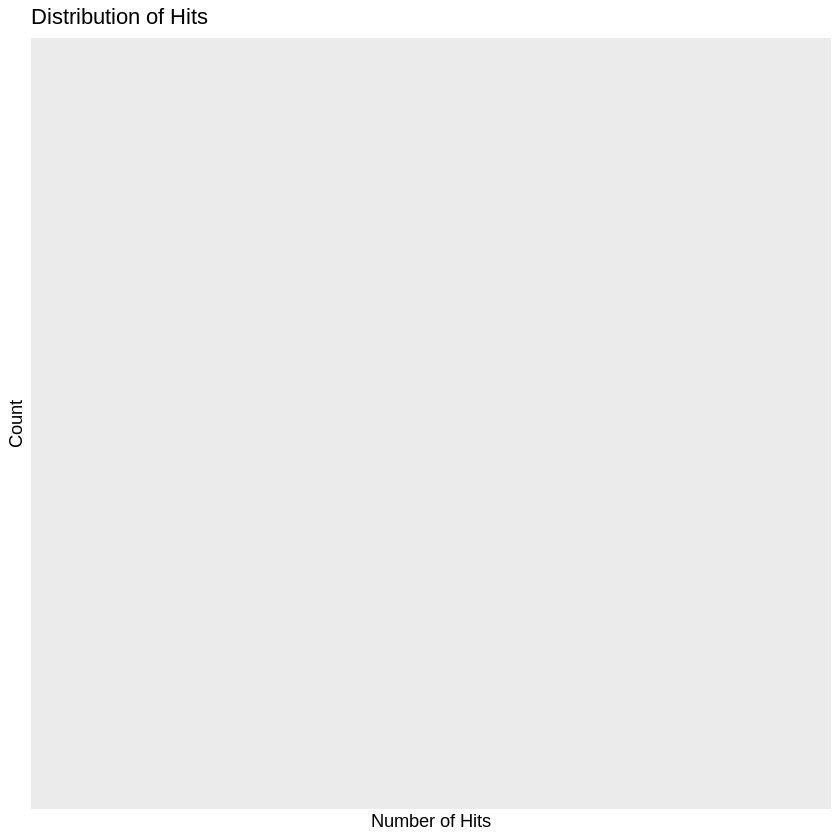

In [ ]:
ggplot(volunteer_data, aes(x = hits)) +
  geom_histogram(binwidth = 10, fill = "blue", color = "black") + # Adjust binwidth if needed
  labs(title = "Distribution of Hits",
       x = "Number of Hits", y = "Count")

1.visual


mod 2


In [ ]:
ggplot(top_orgs, aes(x = reorder(org_title, n), y = n)) +
  geom_col(fill = "purple") +
  coord_flip() +
  labs(title = "Top 10 Organizations with Most Events",
       x = "Organization", y = "Event Count")

ERROR: Error: object 'top_orgs' not found


In [ ]:
# Load necessary libraries
library(ggplot2)
library(reshape2)

# Assuming your data is stored in 'volunteer_data'
# Replace 'df' with 'volunteer_data'

# Create a correlation matrix
cor_matrix <- cor(volunteer_data[sapply(volunteer_data, is.numeric)], use = "complete.obs")

# Reshape the correlation matrix for ggplot
melted_cor_matrix <- melt(cor_matrix)

# Generate the heatmap with ggplot
ggplot(melted_cor_matrix, aes(Var1, Var2, fill = value)) +
  geom_tile() +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", midpoint = 0) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(title = "Correlation Heatmap")

In [ ]:
# Scatter plot of hits vs. volunteer requests
ggplot(volunteer_data, aes(x = hits, y = vol_requests)) +
  geom_point(color = "darkgreen", alpha = 0.5) +
  labs(title = "Relationship between Hits and Volunteer Requests",
       x = "Number of Hits", y = "Number of Volunteer Requests")

In [ ]:
ggplot(volunteer_data, aes(x = hits)) +
  geom_histogram(binwidth = 10, fill = "blue", color = "black") + # Adjust binwidth if needed
  labs(title = "Distribution of Hits",
       x = "Number of Hits", y = "Count")

In [ ]:
ggplot(volunteer_data, aes(x = category_desc)) +
  geom_bar(fill = "tomato") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(title = "Distribution of Volunteer Categories", x = "Category", y = "Count")

MOD 3

In [ ]:
# If there's a Date column in the dataset, analyze monthly trends
volunteer_match$Date <- as.Date(volunteer_match$Date, format = "%Y-%m-%d")
volunteer_match$Month <- format(volunteer_match$Date, "%Y-%m")

monthly_availability <- volunteer_match %>%
  group_by(Month) %>%
  summarise(Total_Hours_Available = sum(Available_Hours))

# Plot availability trends over time
ggplot(monthly_availability, aes(x = Month, y = Total_Hours_Available)) +
  geom_line(color = "darkred") +
  labs(title = "Monthly Volunteer Availability", x = "Month", y = "Total Available Hours") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))
